# STATISTICAL METHODS PROJECT

### Topic: Predictive maintenance using Machine Learning
### Contributors: Naman Chhaparia(I040), Rohan Ajay(I050)

# INTRODUCTION

Predictive maintenance is a technique used to predict when equipment or machinery is likely to fail so that maintenance can be performed just in time to prevent the failure from occurring. It utilizes machine learning and statistical modeling techniques to analyze data collected from sensors, equipment logs, historical maintenance records, and other sources to predict potential failures or breakdowns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score

## STEP 1: LOADING THE DATASET

In [3]:
data = pd.read_csv("predictive_maintenance.csv")
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# STEP 2: EXPLORING THE DATASET

In [4]:
data.head()     # Display the first few rows of the dataseT

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
data.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


From this, we can see that there are no null values or missing values in this dataset. But there are some object data types which need to be converted to numerical data type for model development.

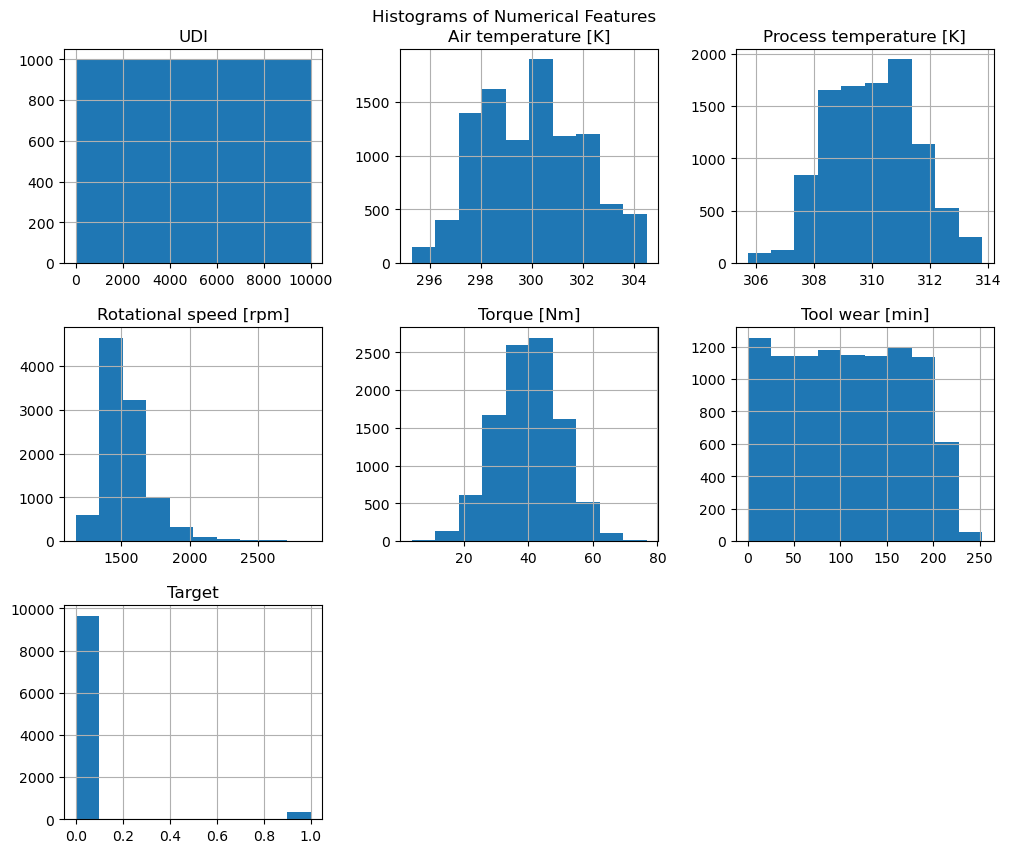

In [6]:
# Histograms for numerical features
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', x=0.5, y=0.92)
plt.show()


Here are some inferences about the data that can be made from the histograms:

* Air temperature: The air temperature appears to be normally distributed, with most values concentrated around 300 Kelvin and fewer values at the extremes.
* Rotational speed: The rotational speed distribution is skewed to the right. This means there are more data points at lower rotational speeds and fewer at higher speeds.
* Tool wear: The tool wear distribution is also skewed to the right, with more readings concentrated at lower wear times and and fewer readings at higher wear times.
* Target: From target we can understand that there are two types of class. Target 0 contains no failures which is in majority and Target 1 contains failure which is in minority.

In [7]:
data['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

## STEP 3: PREPROCESSING THE DATA

In [8]:
# Performing label encoding on all the columns where data type is object
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  int64  
 2   Type                     10000 non-null  int64  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


Now, we can see that all the categorical data has been converted to numerical data type.

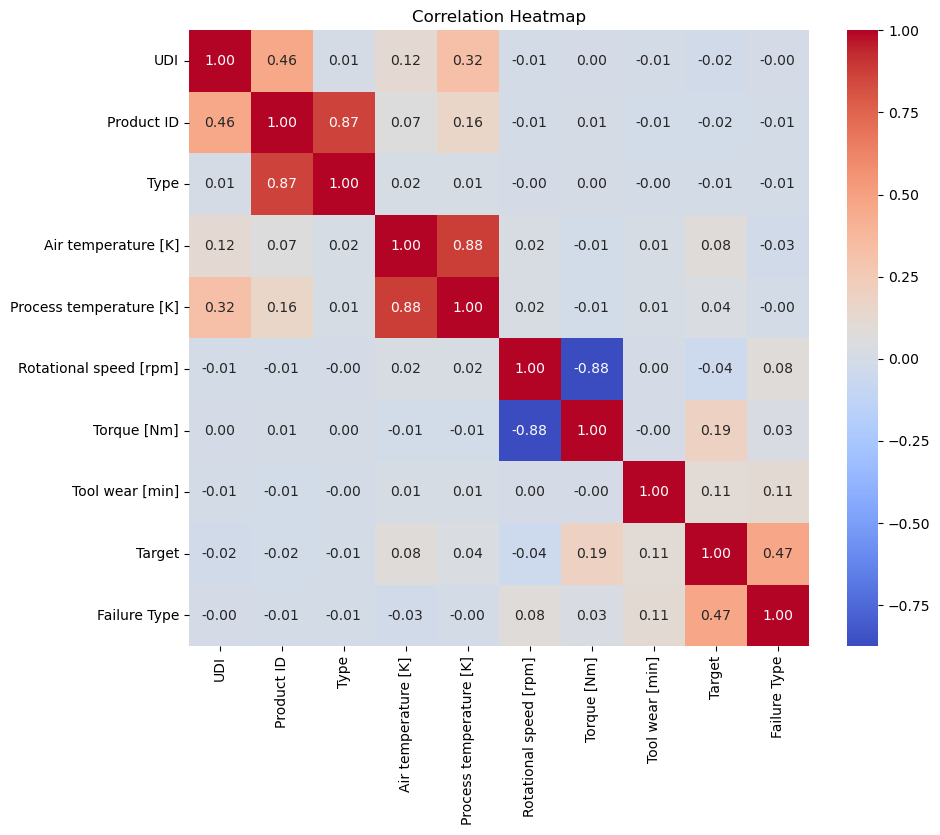

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Here are some inferences that can be made from the heatmap:

* Strong positive correlation: There is a strong positive correlation between process temperature and air temperature. This means that as the process temperature increases, the air temperature also tends to increase. This is likely because the process itself generates heat, which warms up the surrounding air.
* Strong negative correlation: There is a strong negative correlation between rotational speed and torque. This means that as the rotational speed of the tool increases, the torque tends to decrease. This is a complex relationship that depends on the specific machining operation and the material being machined.
* Weak correlations: The remaining correlations appear to be weak. This means that there is no clear linear relationship between the variables.

# STEP 4: SPLITTING THE DATA


In [66]:
# Split the data into training and testing sets

X = data.drop(columns=['Target', 'Failure Type','UDI','Product ID'])
y = data['Target']

# TEST SPLIT 1 FOR TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TEST SPLIT 1 FOR TEST_SIZE = 0.4
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=42)

# TEST SPLIT 1 FOR TEST_SIZE = 0.5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.5, random_state=42)

# STEP 5: TRAINING THE MODEL

In [67]:
# Train a machine learning model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train_scaled1, y_train1)

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train_scaled2, y_train2)

RandomForestClassifier(random_state=42)

# STEP 6: EVALUATING THE MODEL

In [68]:
# Evaluating the model

y_pred = model.predict(X_test_scaled)

y_pred1 = model1.predict(X_test_scaled1)

y_pred2 = model2.predict(X_test_scaled2)

print("\nClassification Report for test split 0.2:")
print(classification_report(y_test, y_pred))

print("\nClassification Report for test split 0.4:")
print(classification_report(y_test1, y_pred1))

print("\nClassification Report for test split 0.5:")
print(classification_report(y_test2, y_pred2))


Classification Report for test split 0.2:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000


Classification Report for test split 0.4:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3871
           1       0.90      0.63      0.74       129

    accuracy                           0.99      4000
   macro avg       0.94      0.81      0.87      4000
weighted avg       0.98      0.99      0.98      4000


Classification Report for test split 0.5:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4837
           1       0.85      0.61      0.71       163

    accuracy                           0.98      5000

Here are some inferences you can make about the performance of your classifier:

* Overall Accuracy: The model performs very well with an accuracy of 99%. This means that out of 4000 samples, the model correctly classified 3960 of them.
* Class Imbalance: The "support" column shows a significant imbalance between the two classes. There are 3871 samples in class 0 and only 129 in class 1. This suggests the model might be biased towards the majority class (class 0) with a higher number of training samples.
* Class 0 Performance: The precision, recall, and F1-score for class 0 are all very high (around 0.99 or 1.00). This indicates the model is very good at identifying true negatives (correctly classifying samples that don't belong to class 0) and true positives (correctly classifying samples that belong to class 0).
* Class 1 Performance: The precision, recall, and F1-score for class 1 are lower than those for class 0 (around 0.90, 0.63, and 0.74 respectively). This suggests the model has some difficulty identifying true positives for class 1. It might be misclassifying some samples that belong to class 1 as belonging to class 0 (false negatives).

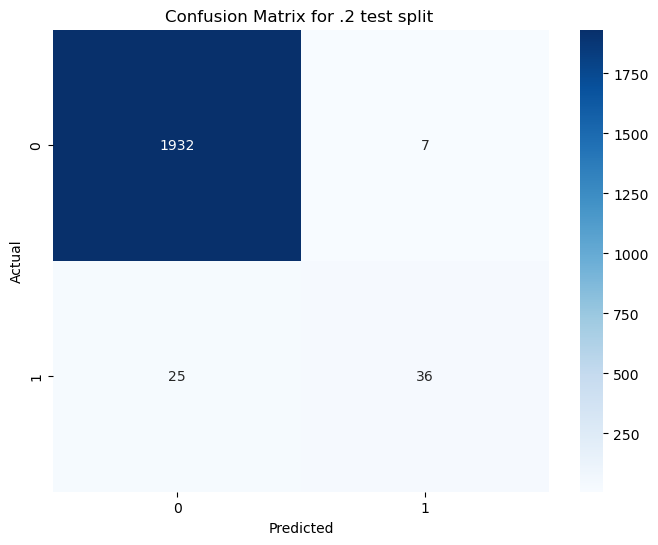

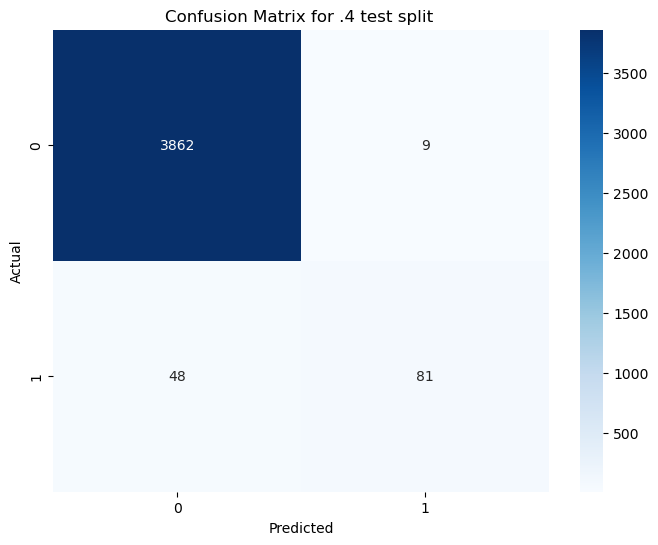

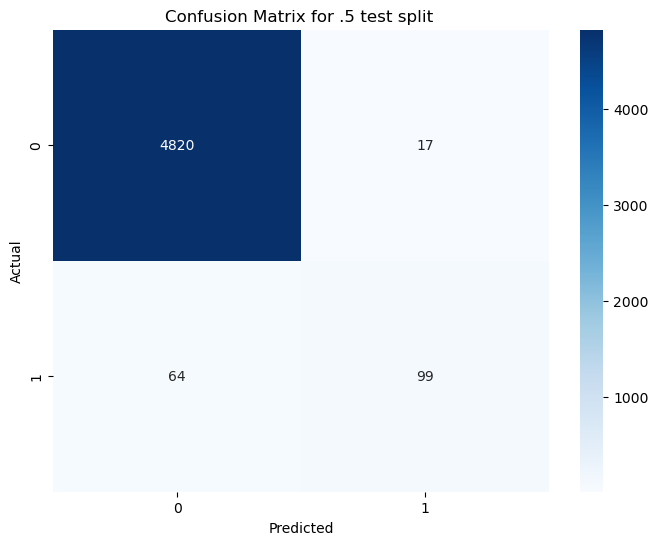

In [69]:
# Confusion matrix for 0.2
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for .2 test split ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for 0.4

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for .4 test split ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for 0.5

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for .5 test split ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

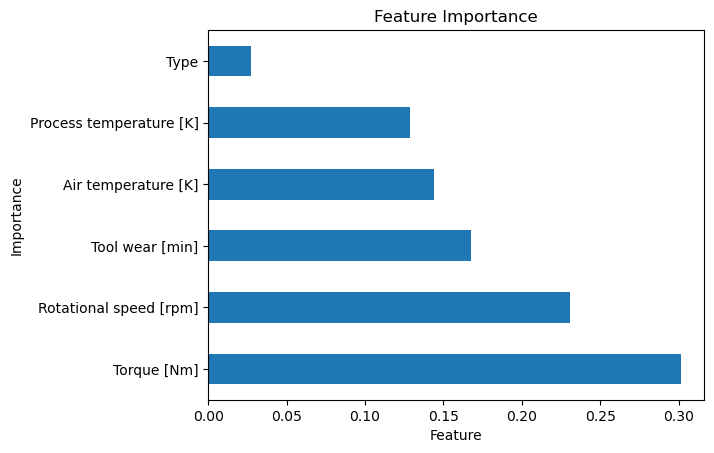

In [70]:
# Plot graphs for better understanding
# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

Here are some inferences that can be made from the graph:

*   The most important feature is process temperature.
*   The least important features are air temperature, tool wear (min), rotational speed, and cumulative tool wear.

# CONCLUSION

In conclusion, predictive maintenance offers organizations a powerful tool for optimizing asset performance, minimizing downtime, and reducing maintenance costs. By harnessing the power of data analytics and machine learning, organizations can transition from reactive or scheduled maintenance practices to a proactive and data-driven approach, ultimately improving operational efficiency, asset reliability, and overall business performance.